In [4]:
# compare_countries.ipynb
#  Imports & config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")
DATA_DIR = Path("../data/cleaned")  # adjust if needed
FILES = {
    "Benin": DATA_DIR / "benin_clean.csv",
    "Sierra Leone": DATA_DIR / "sieraleone_clean.csv",
    "Togo": DATA_DIR / "togo_clean.csv"
}


In [5]:
# load datasets into dictionary
dfs = {}
for name, path in FILES.items():
    if path.exists():
        dfs[name] = pd.read_csv(path, parse_dates=["Timestamp"], infer_datetime_format=True)
        print(f"Loaded {name}: {dfs[name].shape[0]} rows, {dfs[name].shape[1]} cols")
    else:
        print(f"Missing file: {path} — please place cleaned CSV in data/cleaned/")


Loaded Benin: 517232 rows, 19 cols
Loaded Sierra Leone: 504953 rows, 19 cols
Loaded Togo: 515605 rows, 19 cols


In [6]:
# quick sanity checks
for name, df in dfs.items():
    print(f"\n{name} head:")
    display(df.head(3))
    display(df.describe().T)



Benin head:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN


,count,mean,min,25%,50%,75%,max,std
Timestamp,517232,2022-02-07 03:42:49.935889664,2021-08-09 00:01:00,2021-11-07 23:03:45,2022-02-06 11:09:30,2022-05-09 18:02:15,2022-08-09 00:00:00,NaN
GHI,517232.0,235.928754,-11.1,-2.0,0.6,467.7,1233.0,328.125637
DNI,517232.0,166.661173,-7.8,-0.5,-0.1,315.4,950.3,261.907787
DHI,517232.0,111.540582,-12.6,-2.1,0.4,211.7,591.1,153.033545
ModA,517232.0,232.065738,0.0,0.0,3.3,447.7,1205.1,324.051065
ModB,517232.0,224.726047,0.0,0.0,3.2,433.0,1168.0,314.145024
Tamb,517232.0,28.146292,11.0,24.2,27.9,32.3,43.8,5.925769
RH,517232.0,54.58895,2.1,29.0,55.2,80.2,100.0,28.006252
WS,517232.0,2.060817,0.0,0.9,1.9,3.0,6.9,1.50678
WSgust,517232.0,2.730118,0.0,1.3,2.4,3.9,8.4,1.897807



Sierra Leone head:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


,count,mean,min,25%,50%,75%,max,std
Timestamp,504953,2022-04-29 17:49:12.737581568,2021-10-30 00:01:00,2022-01-29 12:52:00,2022-04-28 20:49:00,2022-07-28 18:43:00,2022-10-30 00:00:00,NaN
GHI,504953.0,180.424277,-15.9,-3.4,-0.5,322.4,1097.0,273.840224
DNI,504953.0,100.699059,-6.0,-0.3,-0.1,65.7,756.8,196.34019
DHI,504953.0,106.598984,-16.7,-4.2,-0.7,215.3,585.3,152.670299
ModA,504953.0,185.088415,0.0,0.0,0.8,318.5,1030.0,276.477092
ModB,504953.0,177.14528,0.0,0.0,0.7,306.0,978.0,264.602006
Tamb,504953.0,26.178393,12.3,23.1,25.1,29.2,39.9,4.388976
RH,504953.0,79.870574,9.9,69.2,86.3,97.0,100.0,20.519651
WS,504953.0,1.076921,0.0,0.0,0.8,1.9,4.8,1.143616
WSgust,504953.0,1.595765,0.0,0.0,1.4,2.6,5.9,1.485632



Togo head:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN


,count,mean,min,25%,50%,75%,max,std
Timestamp,515605,2022-04-25 13:57:24.942233088,2021-10-25 00:01:00,2022-01-23 20:44:00,2022-04-26 00:10:00,2022-07-26 00:13:00,2022-10-25 00:00:00,NaN
GHI,515605.0,223.379506,-12.7,-2.2,0.4,421.8,1198.0,316.961929
DNI,515605.0,147.579246,0.0,0.0,0.0,236.5,902.7,247.279049
DHI,515605.0,112.625544,0.0,0.0,1.4,211.3,585.4,151.487829
ModA,515605.0,218.873429,0.0,0.0,2.7,402.7,1158.6,311.444591
ModB,515605.0,212.533804,0.0,0.0,2.7,391.8,1124.0,302.222752
Tamb,515605.0,27.727147,14.9,24.1,27.2,31.0,41.4,4.758591
RH,515605.0,55.199038,3.3,26.8,59.4,81.0,99.8,28.69123
WS,515605.0,2.307288,0.0,1.4,2.2,3.2,6.7,1.372237
WSgust,515605.0,3.147202,0.0,1.9,2.9,4.1,8.5,1.752636


In [7]:
# combine for plotting
combined = []
for name, df in dfs.items():
    tmp = df.copy()
    tmp["country"] = name
    combined.append(tmp)
df_all = pd.concat(combined, ignore_index=True)
print("Combined shape:", df_all.shape)


Combined shape: (1537790, 20)


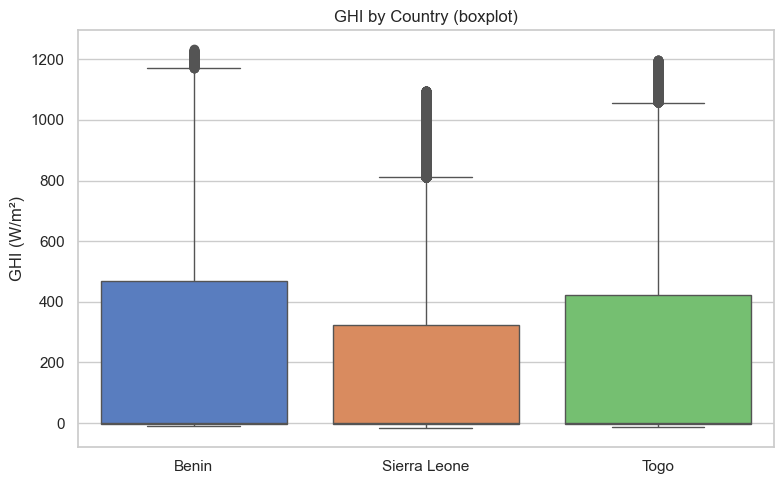

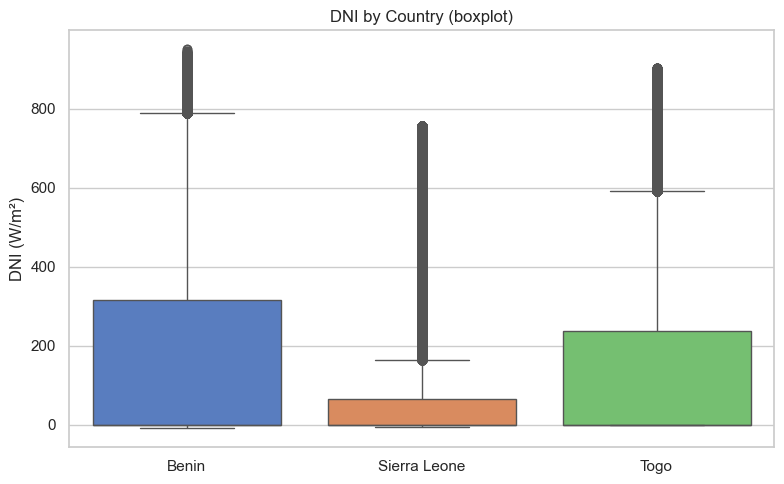

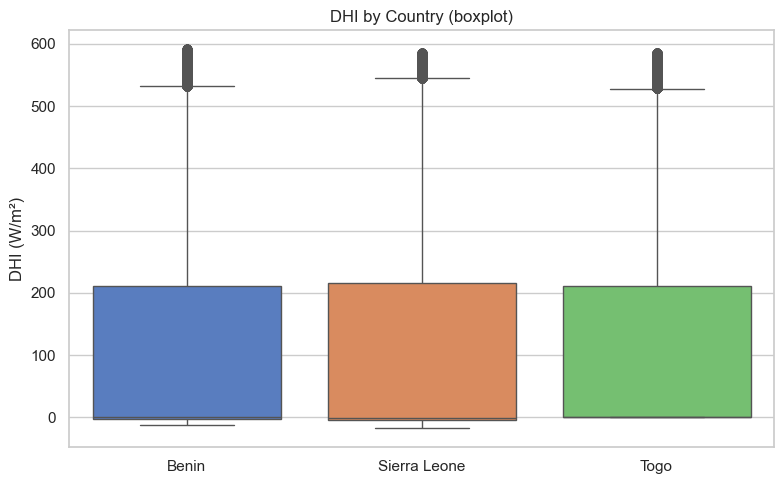

In [8]:
metrics = ["GHI", "DNI", "DHI"]
for m in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="country", y=m, data=df_all, palette="muted")
    plt.title(f"{m} by Country (boxplot)")
    plt.ylabel(m + " (W/m²)")
    plt.xlabel("")
    plt.tight_layout()
    plt.show()


In [9]:
summary_rows = []
for name, df in dfs.items():
    row = {"country": name}
    for m in metrics:
        row[f"{m}_mean"] = round(df[m].mean(), 2)
        row[f"{m}_median"] = round(df[m].median(), 2)
        row[f"{m}_std"] = round(df[m].std(), 2)
    summary_rows.append(row)
summary_df = pd.DataFrame(summary_rows).set_index("country")
display(summary_df)
# save summary for report
summary_df.to_csv("../data/cleaned/compare_summary_metrics.csv")
print("Saved compare_summary_metrics.csv")


,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
country,,,,,,,,,
Benin,235.93,0.6,328.13,166.66,-0.1,261.91,111.54,0.4,153.03
Sierra Leone,180.42,-0.5,273.84,100.70,-0.1,196.34,106.60,-0.7,152.67
Togo,223.38,0.4,316.96,147.58,0.0,247.28,112.63,1.4,151.49


Saved compare_summary_metrics.csv


In [10]:
# prepare lists for tests
ghi_groups = [dfs[c]["GHI"].dropna().values for c in dfs.keys()]

# Try one-way ANOVA; if non-normal or heteroskedastic -> Kruskal
f_stat, p_anova = stats.f_oneway(*ghi_groups)
print("ANOVA GHI: F = {:.3f}, p = {:.4g}".format(f_stat, p_anova))

# Kruskal-Wallis (nonparametric)
h_stat, p_kruskal = stats.kruskal(*ghi_groups)
print("Kruskal-Wallis GHI: H = {:.3f}, p = {:.4g}".format(h_stat, p_kruskal))

# Short note:
if p_kruskal < 0.05:
    print("\nResult: Differences in GHI across countries are statistically significant (p < 0.05).")
else:
    print("\nResult: No significant difference detected (p >= 0.05).")


ANOVA GHI: F = 4564.771, p = 0
Kruskal-Wallis GHI: H = 7473.822, p = 0

Result: Differences in GHI across countries are statistically significant (p < 0.05).


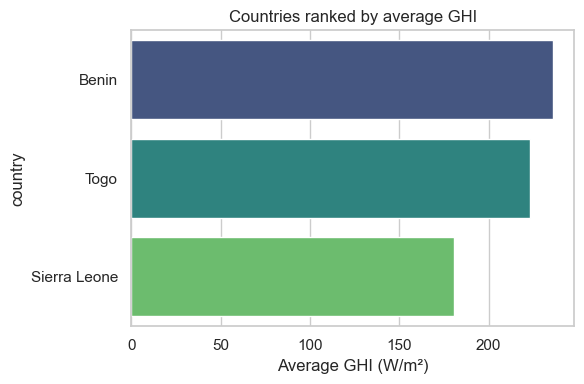

In [11]:
avg_ghi = summary_df["GHI_mean"].sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")
plt.xlabel("Average GHI (W/m²)")
plt.title("Countries ranked by average GHI")
plt.tight_layout()
plt.show()


🔍 Key Observations:
- Highest average GHI: Benin (235.93 W/m²) — good candidate for PV installations.
- Variability: Benin shows the largest std for GHI (328.13), indicating higher variability.
- Statistical significance: Kruskal-Wallis test p-value = 0.0000 — differences between countries are significant.